In [3]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif, mutual_info_classif 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, fbeta_score, roc_curve
from datetime import datetime, date, time

In [5]:
# read data
data_train = pd.read_csv('D:/Python/Codes/projects/SkillFactory/module_5/train.csv')
data_test = pd.read_csv('D:/Python/Codes/projects/SkillFactory/module_5/test.csv')
sample_submission = pd.read_csv('D:/Python/Codes/projects/SkillFactory/module_5/sample_submission.csv')
# check the shapes
data_train.shape, data_test.shape, sample_submission.shape

((73799, 19), (36349, 18), (36349, 2))

In [6]:
# merge train and test for 
data_train['sample'] = 1 # mark the train
data_test['sample'] = 0  # mark the test
data_test['default'] = 0 # mark default as 0
data = data_test.append(data_train, sort=False).reset_index(drop=True) # merge

In [7]:
# let's look at data
print(data.head(25))
data.nunique(dropna=False)

    client_id   app_date education sex  age car car_type  decline_app_cnt  \
0       74835  22MAR2014       GRD   M   29   Y        Y                0   
1       17527  24JAN2014       SCH   F   39   N        N                5   
2       75683  23MAR2014       UGR   M   50   Y        Y                0   
3       26883  03FEB2014       SCH   M   56   N        N                0   
4       28862  04FEB2014       GRD   F   38   N        N                0   
5       99881  17APR2014       SCH   F   55   N        N                0   
6       26630  02FEB2014       SCH   F   30   N        N                3   
7       79934  28MAR2014       GRD   M   41   Y        Y                0   
8       16605  23JAN2014       GRD   M   34   N        N                0   
9      105449  24APR2014       UGR   M   28   Y        Y                0   
10      49000  25FEB2014       GRD   F   32   Y        Y                0   
11      28589  04FEB2014       GRD   M   37   Y        Y                0   

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [8]:
# Describing features
#     client_id - client id
#     education - education degree
#     sex - client sex
#     age - client age
#     car - car presense
#     car_type - foreign car presense
#     decline_app_cnt - refused applications
#     good_work - good work presense
#     bki_request_cnt - request to BKI
#     home_address - living address degree
#     work_address - work address degree
#     income - client income
#     foreign_passport - foreign passport presense
#     sna - social network analysis
#     first_time - information about clients accuracy 
#     score_bki - BKI score
#     region_rating - region rating
#     app_date - application date
#     default - default ability

In [10]:
# data preprocessing
data["education"].fillna("NoEd", inplace = True)

# datetime variables
dt_cols = ['app_date']

# binary variables
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# categorical variables
cat_cols = ['education', 'work_address', 'home_address', 'sna', 'first_time']

# digital variables
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']

# converting binary variables to digital format 
label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])

# convert to datetime format
data['app_date'] = pd.to_datetime(data['app_date'])

# get dummies from categorical variables
col_dummies = ['education', 'sex', 'car', 'car_type', 'good_work', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time', 'foreign_passport']
data_dummies = pd.get_dummies(data[col_dummies], columns=col_dummies)
data = pd.concat([data, data_dummies], axis = 1)
data
# check changes:

data.head(25)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4,foreign_passport_0,foreign_passport_1
0,74835,2014-03-22,GRD,1,29,1,1,0,0,-2.271884,...,1,0,0,0,0,0,0,1,1,0
1,17527,2014-01-24,SCH,0,39,0,0,5,0,-1.504999,...,0,0,0,1,0,0,1,0,1,0
2,75683,2014-03-23,UGR,1,50,1,1,0,0,-1.691339,...,1,0,0,0,0,0,1,0,0,1
3,26883,2014-02-03,SCH,1,56,0,0,0,0,-2.374182,...,1,0,0,0,0,0,1,0,1,0
4,28862,2014-02-04,GRD,0,38,0,0,0,0,-2.487502,...,1,0,0,0,0,0,1,0,1,0
5,99881,2014-04-17,SCH,0,55,0,0,0,0,-1.740224,...,0,1,0,0,1,0,0,0,1,0
6,26630,2014-02-02,SCH,0,30,0,0,3,0,-1.387847,...,0,0,0,1,0,0,1,0,1,0
7,79934,2014-03-28,GRD,1,41,1,1,0,0,-3.066047,...,0,0,0,1,1,0,0,0,1,0
8,16605,2014-01-23,GRD,1,34,0,0,0,0,-3.117086,...,1,0,0,0,0,1,0,0,1,0
9,105449,2014-04-24,UGR,1,28,1,1,0,0,-2.185172,...,1,0,0,0,0,0,1,0,0,1


Features Analysys

In [11]:
data.client_id.value_counts()
# id's are not duplicated

2049     1
60104    1
39622    1
33477    1
35524    1
        ..
68875    1
66826    1
72969    1
70920    1
2047     1
Name: client_id, Length: 110148, dtype: int64

In [12]:
time_delta = [data.app_date.min(), data.app_date.max()]
print(time_delta)
print(data.app_date.value_counts(bins = 4))
# most applications were in March, least at January, range is 4000 aplications. we will check later importance of date of application

[Timestamp('2014-01-01 00:00:00'), Timestamp('2014-04-30 00:00:00')]
(2014-03-01 12:00:00, 2014-03-31 06:00:00]              30749
(2014-01-30 18:00:00, 2014-03-01 12:00:00]              29161
(2014-03-31 06:00:00, 2014-04-30]                       26266
(2013-12-31 21:08:38.399999999, 2014-01-30 18:00:00]    23972
Name: app_date, dtype: int64


SCH     57998
GRD     34768
UGR     14748
PGR      1865
NoEd      478
ACD       291
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

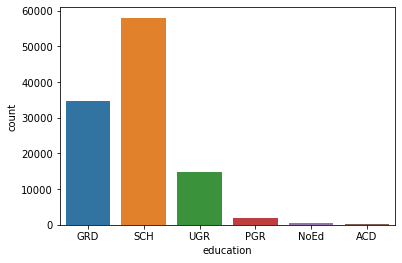

In [13]:
# check education distribution
print(data.education.value_counts())
sns.countplot(x = 'education', data = data)

In [14]:
# split default by education
edu_def = data.groupby(['education'])['default'].value_counts(normalize = True)
edu_def
# we can see, that higher degree describes lower risk of default

education  default
ACD        0          0.972509
           1          0.027491
GRD        0          0.939456
           1          0.060544
NoEd       0          0.926778
           1          0.073222
PGR        0          0.956568
           1          0.043432
SCH        0          0.899100
           1          0.100900
UGR        0          0.912463
           1          0.087537
Name: default, dtype: float64

In [15]:
# split default by sex
sex_def = data.groupby(['sex'])['default'].value_counts(normalize = True)
sex_def
# we can see, that there is no difference in sex, it distributred equally

sex  default
0    0          0.918510
     1          0.081490
1    0          0.910312
     1          0.089688
Name: default, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

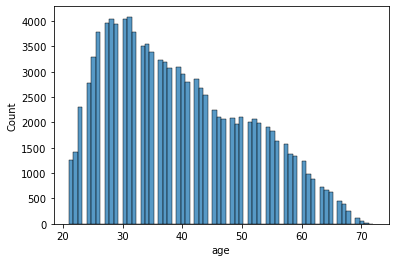

In [16]:
sns.histplot(data.age)
# Age distribution skewed to left, we will have to scale it later

In [17]:
# split default by car
car_def = data.groupby(['car'])['default'].value_counts(normalize = True)
car_def
# we can see, that people without car have more risk to default

car  default
0    0          0.90813
     1          0.09187
1    0          0.92897
     1          0.07103
Name: default, dtype: float64

In [18]:
# split default by car_type
cart_def = data.groupby(['car_type'])['default'].value_counts(normalize = True)
cart_def
# car type analysis shows, that people with foreign cars are less risky

car_type  default
0         0          0.908604
          1          0.091396
1         0          0.941689
          1          0.058311
Name: default, dtype: float64

0     91471
1     12500
2      3622
3      1365
4       606
5       255
6       156
7        58
8        37
9        29
10       16
11       10
12        5
13        4
14        3
16        3
15        1
19        1
20        1
21        1
22        1
24        1
30        1
33        1
Name: decline_app_cnt, dtype: int64


<AxesSubplot:xlabel='decline_app_cnt', ylabel='Count'>

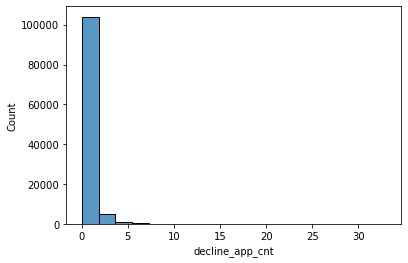

In [19]:
print(data.decline_app_cnt.value_counts())
sns.histplot(data.decline_app_cnt)
# Age distribution skewed to right, we will have to scale it later

In [20]:
print(data['decline_app_cnt'].value_counts(normalize = True))
# 83% get positive answer at once, at second request approved 11% 
# group all request in 3 groups, 2 or more declines let's group in one 
data['decline_app_cnt'] = data['decline_app_cnt'].apply(lambda x: x if x < 2 else 2)

0     0.830437
1     0.113484
2     0.032883
3     0.012392
4     0.005502
5     0.002315
6     0.001416
7     0.000527
8     0.000336
9     0.000263
10    0.000145
11    0.000091
12    0.000045
13    0.000036
14    0.000027
16    0.000027
15    0.000009
19    0.000009
20    0.000009
21    0.000009
22    0.000009
24    0.000009
30    0.000009
33    0.000009
Name: decline_app_cnt, dtype: float64


0    91471
1    12500
2     6177
Name: decline_app_cnt, dtype: int64


<AxesSubplot:xlabel='decline_app_cnt', ylabel='Count'>

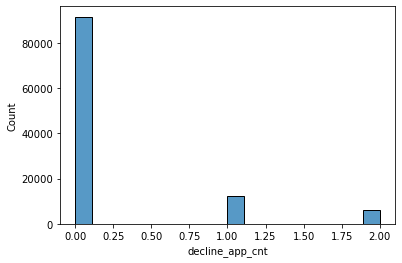

In [21]:
print(data.decline_app_cnt.value_counts())
sns.histplot(data.decline_app_cnt)

In [22]:
# split default by work
work_def = data.groupby(['good_work'])['default'].value_counts(normalize = True)
work_def
# we can see, that people with bad work are less willing to return money

good_work  default
0          0          0.910550
           1          0.089450
1          0          0.936921
           1          0.063079
Name: default, dtype: float64

-1.775263    517
-2.104211    454
-2.225004    424
-2.169664    375
-2.024100    278
            ... 
-1.544707      1
-1.339377      1
-1.670881      1
-2.291558      1
-2.296371      1
Name: score_bki, Length: 102618, dtype: int64


<AxesSubplot:xlabel='score_bki', ylabel='Count'>

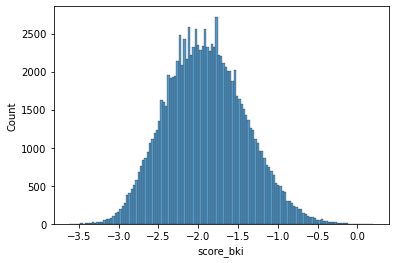

In [23]:
print(data.score_bki.value_counts())
sns.histplot(data.score_bki)
# BKI scoring is normally distributed

0     28908
1     27295
2     20481
3     13670
4      8406
5      4960
6      2500
7      1292
8       735
9       459
10      350
11      278
12      217
13      151
14      110
15       81
16       58
17       33
18       32
19       30
21       19
20       14
24       12
23       12
22        8
25        5
27        5
28        5
26        4
32        4
29        3
40        2
33        2
36        1
34        1
41        1
45        1
46        1
47        1
53        1
Name: bki_request_cnt, dtype: int64


<AxesSubplot:xlabel='bki_request_cnt', ylabel='Count'>

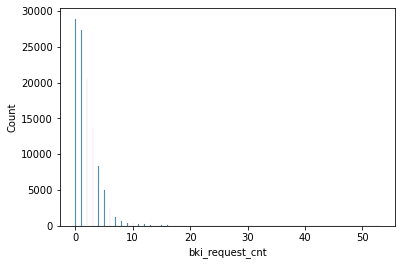

In [24]:
print(data.bki_request_cnt.value_counts())
sns.histplot(data.bki_request_cnt)
# bki_request_cnt skewed to right

50    40981
60    23999
40    17947
80    17170
70     9304
30      434
20      313
Name: region_rating, dtype: int64


<AxesSubplot:xlabel='region_rating', ylabel='Count'>

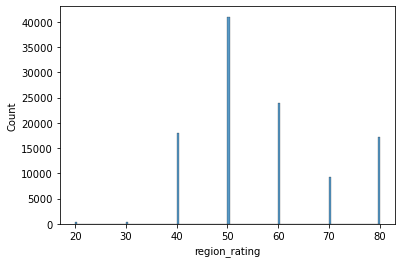

In [25]:
print(data.region_rating.value_counts())
sns.histplot(data.region_rating)

In [26]:
reg_def = data.groupby(['region_rating'])['default'].value_counts(normalize = True)
reg_def
# region has impact on default risk, regions with lesser rating are more risky

region_rating  default
20             0          0.859425
               1          0.140575
30             0          0.868664
               1          0.131336
40             0          0.886276
               1          0.113724
50             0          0.908567
               1          0.091433
60             0          0.913705
               1          0.086295
70             0          0.938414
               1          0.061586
80             0          0.951136
               1          0.048864
Name: default, dtype: float64

In [27]:
print(data.home_address.value_counts())
home_def = data.groupby(['home_address'])['default'].value_counts(normalize = True)
home_def

2    59591
1    48688
3     1869
Name: home_address, dtype: int64


home_address  default
1             0          0.937829
              1          0.062171
2             0          0.895974
              1          0.104026
3             0          0.921883
              1          0.078117
Name: default, dtype: float64

In [28]:
print(data.work_address.value_counts())
work_def = data.groupby(['work_address'])['default'].value_counts(normalize = True)
work_def

3    67113
2    30761
1    12274
Name: work_address, dtype: int64


work_address  default
1             0          0.949650
              1          0.050350
2             0          0.931667
              1          0.068333
3             0          0.900884
              1          0.099116
Name: default, dtype: float64

In [29]:
# both work and home adresses with higher rating corresponds to better return rate

In [30]:
income_delta = [data.income.min(), data.income.max()]
print(income_delta)
print(data.income.value_counts(bins = 4))

[1000, 1000000]
(0.999, 250750.0]        109437
(250750.0, 500500.0]        591
(500500.0, 750250.0]         70
(750250.0, 1000000.0]        50
Name: income, dtype: int64


<AxesSubplot:xlabel='income', ylabel='Count'>

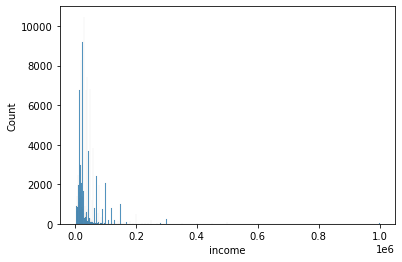

In [31]:
sns.histplot(data.income)
# income skewed to right

In [32]:
data['income'].describe()
# standard deviation very high, we have outliers

count     110148.000000
mean       41012.648537
std        45399.735051
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

In [33]:
print(data.sna.value_counts())
sna_def = data.groupby(['sna'])['default'].value_counts(normalize = True)
sna_def

1    70681
4    17481
2    15832
3     6154
Name: sna, dtype: int64


sna  default
1    0          0.934282
     1          0.065718
2    0          0.899444
     1          0.100556
3    0          0.894378
     1          0.105622
4    0          0.857846
     1          0.142154
Name: default, dtype: float64

<AxesSubplot:xlabel='sna', ylabel='Count'>

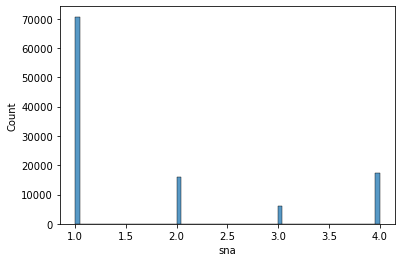

In [34]:
sns.histplot(data.sna)
# we can see that higher rating sna tends to lesser default

In [35]:
print(data.first_time.value_counts())
times_def = data.groupby(['first_time'])['default'].value_counts(normalize = True)
times_def
# as longer bank has information about client as more chances for return

3    46588
4    28017
1    18296
2    17247
Name: first_time, dtype: int64


first_time  default
1           0          0.875492
            1          0.124508
2           0          0.895750
            1          0.104250
3           0          0.919314
            1          0.080686
4           0          0.945140
            1          0.054860
Name: default, dtype: float64

In [36]:
# split default by foreign passport
pass_def = data.groupby(['foreign_passport'])['default'].value_counts(normalize = True)
pass_def
# we can see, that people with native passport are less willing to return money

foreign_passport  default
0                 0          0.908750
                  1          0.091250
1                 0          0.950082
                  1          0.049918
Name: default, dtype: float64

In [37]:
# log of skewed distributions
data['age_log'] = data['age'].apply(lambda x: np.log(x))
data['income_log'] = data['income'].apply(lambda x: np.log(x))

Preparing for test

In [38]:
# drop columns
data_dropped = data.drop(['client_id','app_date', 'age','income', 'education', 'sex', 'car', 'car_type', 'good_work', 'region_rating', 'home_address', 
                          'work_address', 'sna', 'first_time', 'foreign_passport'], axis=1)
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 81 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   decline_app_cnt     110148 non-null  int64  
 1   score_bki           110148 non-null  float64
 2   bki_request_cnt     110148 non-null  int64  
 3   sample              110148 non-null  int64  
 4   default             110148 non-null  int64  
 5   education_ACD       110148 non-null  uint8  
 6   education_GRD       110148 non-null  uint8  
 7   education_NoEd      110148 non-null  uint8  
 8   education_PGR       110148 non-null  uint8  
 9   education_SCH       110148 non-null  uint8  
 10  education_UGR       110148 non-null  uint8  
 11  sex_0               110148 non-null  uint8  
 12  sex_1               110148 non-null  uint8  
 13  car_0               110148 non-null  uint8  
 14  car_1               110148 non-null  uint8  
 15  car_type_0          110148 non-nul

In [40]:
# corelation analysis
corr = data_dropped.corr()

s = corr.unstack()
so = s.sort_values(kind="quicksort")
so[(so > 0.75) & (so < 1)]
# as we see addresses are high correlated

home_address_2  work_address_3    0.795366
                work_address_3    0.795366
work_address_3  home_address_2    0.795366
                home_address_2    0.795366
                home_address_2    0.795366
                home_address_2    0.795366
home_address_2  work_address_3    0.795366
                work_address_3    0.795366
dtype: float64

In [41]:
#correlation with target value
corr.abs().sort_values(['default'], ascending = False)[['default']]

,default
default,1.000000
sample,0.214022
score_bki,0.139777
decline_app_cnt,0.099770
sna_1,0.092895
...,...
home_address_3,0.003282
education_NoEd,0.002807
education_NoEd,0.002807
region_rating_60,0.002288


<AxesSubplot:>

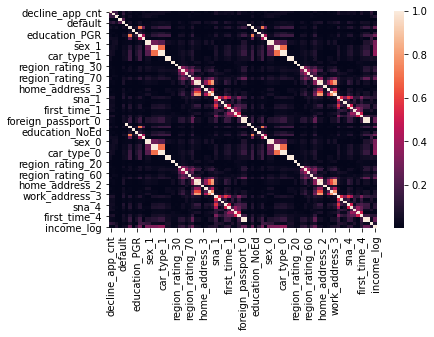

In [42]:
#heatmap of correlation
sns.heatmap(data_dropped.corr().abs())

In [43]:
# split dataset
traine = data_dropped.query('sample == 1').drop(['sample'], axis=1)
test = data_dropped.query('sample == 0').drop(['sample', 'default'], axis=1)

train, validation = train_test_split(traine, test_size=0.20, random_state=42)
X_train = train[['decline_app_cnt','score_bki','education_ACD','education_GRD','education_NoEd','education_PGR','education_SCH','education_UGR',
                'sex_0','sex_1','car_0','car_1', 'car_type_0', 'car_type_1','good_work_0','good_work_1','region_rating_20','region_rating_30','region_rating_40',
                'region_rating_50','region_rating_60','region_rating_70','region_rating_80','home_address_1','home_address_2', 'home_address_3', 'work_address_1',
                'work_address_2', 'work_address_3','sna_1','sna_2','sna_3','sna_4', 'first_time_1','first_time_2', 'first_time_3','first_time_4','foreign_passport_0',
                'foreign_passport_1', 'age_log','income_log', 'bki_request_cnt']]
y_train = train['default']
X_validation = validation[['decline_app_cnt','score_bki','education_ACD','education_GRD','education_NoEd','education_PGR','education_SCH','education_UGR',
                'sex_0','sex_1','car_0','car_1', 'car_type_0', 'car_type_1','good_work_0','good_work_1','region_rating_20','region_rating_30','region_rating_40',
                'region_rating_50','region_rating_60','region_rating_70','region_rating_80','home_address_1','home_address_2', 'home_address_3', 'work_address_1',
                'work_address_2', 'work_address_3','sna_1','sna_2','sna_3','sna_4', 'first_time_1','first_time_2', 'first_time_3','first_time_4','foreign_passport_0',
                'foreign_passport_1', 'age_log','income_log', 'bki_request_cnt']]
y_validation = validation['default']
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape
corr = corr.drop(['sample'])

In [44]:
# searching for features for learning
roc_auc_ = 0
f_beta_t_ = 0
f_beta_v_ = 0
i_roc_auc_ = 0
i_beta_t_ = 0
i_beta_v_ = 0
roc_auc_l = []
f_beta_t_l = []
f_beta_v_l = []


for i in range(corr.shape[1]-5):
    col = corr.abs().sort_values(['default'], ascending = False)[['default']].index[1:i+4]
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train[col], y_train)
    y_pred = model.predict(X_validation[col])
    y_pred_proba = model.predict_proba(X_validation[col])
    y_pred_train = model.predict(X_train[col])
    # Считаем метрики
    roc_auc = roc_auc_score(y_validation, y_pred_proba[:,1])
    roc_auc_l.append(round(roc_auc, 3))
    f_beta_t = fbeta_score(y_train, y_pred_train, beta = 0.5)
    f_beta_t_l.append(round(f_beta_t, 3))
    f_beta_v = fbeta_score(y_validation, y_pred, beta = 0.5)
    f_beta_v_l.append(round(f_beta_v, 3))
    if roc_auc_ < roc_auc:
        roc_auc_ = roc_auc
        i_roc_auc_ = i+4
    if f_beta_t_ < f_beta_t:
        f_beta_t_ = f_beta_t
        i_beta_t_ = i+4
    if f_beta_v_ < f_beta_v:
        f_beta_v_ = f_beta_v
        i_beta_v_ = i+4

Maximum roc_auc 0.7406516114312529 with columns to 67
Maximum f_beta_t 0.11470620062763769 with columns to 78
Maximum f_beta_v 0.10194834617127321 with columns to 50
roc_auc change chart


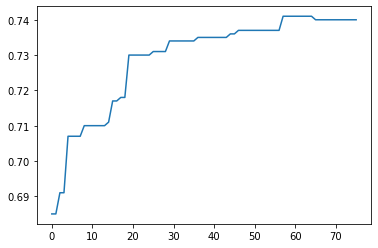

In [46]:
print(f"Maximum roc_auc {roc_auc_} with columns to {i_roc_auc_}")
print(f"Maximum f_beta_t {f_beta_t_} with columns to {i_beta_t_}")
print(f"Maximum f_beta_v {f_beta_v_} with columns to {i_beta_v_}")
print("roc_auc change chart")
plt.plot(roc_auc_l)

f_beta metric change for testing and validation samples
blue - f_beta testing sample, orange - f_beta validation sample


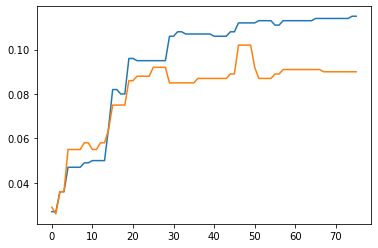

In [47]:
print("f_beta metric change for testing and validation samples")
print("blue - f_beta testing sample, orange - f_beta validation sample")
plt.plot(f_beta_t_l)
plt.plot(f_beta_v_l)

In [48]:
# list of features suited for testing
col_for_predicted = corr.abs().sort_values(['default'], ascending = False)[['default']].index[1:i_beta_v_]
col_for_predicted

Index(['score_bki', 'decline_app_cnt', 'sna_1', 'sna_1', 'sna_4', 'sna_4',
       'home_address_2', 'home_address_2', 'home_address_1', 'home_address_1',
       'first_time_4', 'first_time_4', 'first_time_1', 'first_time_1',
       'work_address_3', 'work_address_3', 'bki_request_cnt', 'education_SCH',
       'education_SCH', 'education_GRD', 'education_GRD', 'region_rating_80',
       'region_rating_80', 'foreign_passport_0', 'foreign_passport_0',
       'foreign_passport_1', 'foreign_passport_1', 'car_type_0', 'car_type_0',
       'car_type_1', 'car_type_1', 'region_rating_40', 'region_rating_40',
       'work_address_1', 'work_address_1', 'income_log', 'work_address_2',
       'work_address_2', 'good_work_1', 'good_work_1', 'good_work_0',
       'good_work_0', 'car_1', 'car_1', 'car_0', 'car_0', 'first_time_2',
       'first_time_2', 'region_rating_70'],
      dtype='object')

Learning

(59039, 50) (59039,) (14760, 50) (14760,)
confusion_matrix on train sample
[[51293   201]
 [ 7339   206]]

confusion_matrix on validation sample
[[12883    50]
 [ 1782    45]]

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     12933
           1       0.47      0.02      0.05      1827

    accuracy                           0.88     14760
   macro avg       0.68      0.51      0.49     14760
weighted avg       0.83      0.88      0.82     14760



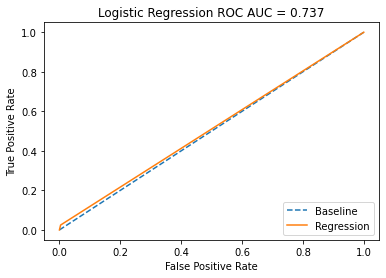

In [49]:
#split data
X_train = train[['score_bki', 'decline_app_cnt', 'sna_1', 'sna_4', 'home_address_2',
       'home_address_1', 'first_time_4', 'first_time_1', 'work_address_3',
       'bki_request_cnt', 'education_SCH', 'education_GRD', 'region_rating_80',
       'foreign_passport_0', 'foreign_passport_1', 'car_type_0', 'car_type_1',
       'region_rating_40', 'work_address_1', 'income_log', 'work_address_2',
       'good_work_1', 'good_work_0', 'car_1', 'car_0', 'first_time_2',
       'region_rating_70']]
y_train = train['default']
X_validation = validation[['score_bki', 'decline_app_cnt', 'sna_1', 'sna_4', 'home_address_2',
       'home_address_1', 'first_time_4', 'first_time_1', 'work_address_3',
       'bki_request_cnt', 'education_SCH', 'education_GRD', 'region_rating_80',
       'foreign_passport_0', 'foreign_passport_1', 'car_type_0', 'car_type_1',
       'region_rating_40', 'work_address_1', 'income_log', 'work_address_2',
       'good_work_1', 'good_work_0', 'car_1', 'car_0', 'first_time_2',
       'region_rating_70']]
y_validation = validation['default']
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape)
# using Logistic Regression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_validation)
y_pred_proba = clf.predict_proba(X_validation)
y_pred_train = clf.predict(X_train)
print('confusion_matrix on train sample')
print(confusion_matrix(y_train, y_pred_train))
print()
print('confusion_matrix on validation sample')
print(confusion_matrix(y_validation, y_pred))
print()
print(classification_report(y_validation, y_pred))
roc_auc = roc_auc_score(y_validation, y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_validation, y_pred)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [50]:
# looking for best regression parameters
model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## aplying on our model
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

# best parametres 
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

D:\Python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.33542171        nan
 0.33542163        nan 0.05079786 0.05152963        nan 0.05106001
 0.05104751 0.05079786 0.05152963        nan 0.05106001 0.05104751
 0.33549934 0.3360057  0.33561198 0.33570401 0.33540017 0.33549934
 0.3360057  0.33561198 0.33564722 0.33541087 0.05104651 0.0515151
 0.05105277 0.05129091 0.05104651 0.0515151  0.05105277 0.05129091
 0.33555498 0.33606084 0.33574537 0.33540138 0.33555498 0.33606084
 0.3353827  0.33541135]
  warnings.warn(


	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'auto'
	n_jobs: None
	penalty: 'none'
	random_state: None
	solver: 'lbfgs'
	tol: 0.001
	verbose: 0
	warm_start: False


D:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


D:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion_matrix on train sample
[[34215 17279]
 [ 2524  5021]]

confusion_matrix on validation sample
[[8561 4372]
 [ 579 1248]]

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     12933
           1       0.22      0.68      0.34      1827

    accuracy                           0.66     14760
   macro avg       0.58      0.67      0.56     14760
weighted avg       0.85      0.66      0.72     14760



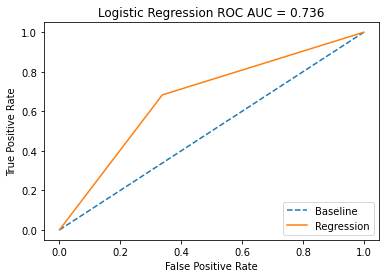

In [51]:
# applying parameters
clf = LogisticRegression(C = 1.0, class_weight = 'balanced', dual = False, fit_intercept = True, intercept_scaling = 1,
                         l1_ratio = None, max_iter = 50, multi_class = 'auto', n_jobs = None, penalty = 'none',
                         random_state = None, solver = 'lbfgs', tol = 0.001, verbose = 0, warm_start = False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_validation)
y_pred_proba = clf.predict_proba(X_validation)
y_pred_train = clf.predict(X_train)
print('confusion_matrix on train sample')
print(confusion_matrix(y_train, y_pred_train))
print()
print('confusion_matrix on validation sample')
print(confusion_matrix(y_validation, y_pred))
print()
print(classification_report(y_validation, y_pred))
roc_auc = roc_auc_score(y_validation, y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_validation, y_pred)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Submission

In [52]:
X_test = test[['score_bki', 'decline_app_cnt', 'sna_1', 'sna_4', 'home_address_2',
       'home_address_1', 'first_time_4', 'first_time_1', 'work_address_3',
       'bki_request_cnt', 'education_SCH', 'education_GRD', 'region_rating_80',
       'foreign_passport_0', 'foreign_passport_1', 'car_type_0', 'car_type_1',
       'region_rating_40', 'work_address_1', 'income_log', 'work_address_2',
       'good_work_1', 'good_work_0', 'car_1', 'car_0', 'first_time_2',
       'region_rating_70']]
y_submit = clf.predict(X_test)

sample_submission['default'] = y_submit
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,0
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0
